# Nutritional Facts for most common foods
Source: https://www.kaggle.com/datasets/niharika41298/nutrition-details-for-most-common-foods  
(this is the larger dataset)

### Possible scenario ??:  
- A nutritionist creates custom diet plans for clients with medically-necessary dietary needs and wellness goals
- They want to be able to break down prescribed diets by the meal and the recipe, and to have the ability to specify calories, macro and micronutrients, and vitamins/minerals
- We have met with the client and obtained the following dataset detailing this information for an array of pre-defined meals. The client would like to be able to input their client's nutrition requirements and discover which meals to offer the client.  
- This input contains several parts:  
1. what the client likes and doesn't like to eat  
2. the nutritionist's breakdown specifying the client's prescription for that meal. 

- The returned result will be the meals which fit the client's taste and nutritional needs.  
- We will first study and organize the dataset to pick up on patterns across the food types  
- Then we can create a hypothetical plan for the best way for the end user (the nutritionist) to access and manipulate the data. Like a program, database, etc.  
- Further, we could see if the nutritionist's meal options are sufficient by examinig how many options are available for different dietary needs  

### Questions
1. What 

### Data Acquisition

preview of `nutrition.csv`:

In [722]:
import pandas as pd
# create dataframe
nutrition = pd.read_csv("nutrition.csv")
# display a preview
nutrition.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [723]:
# print the number of cols, rows
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nThere are " + str(nutrition.shape[1]) + " columns and " + str(nutrition.shape[0]) + " rows.\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
There are 77 columns and 8789 rows.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [724]:
# basic statistics for the numerical columns
nutrition.describe()

,Unnamed: 0,calories,lucopene
count,8789.000000,8789.000000,8789.0
mean,4394.000000,226.283878,0.0
std,2537.310091,169.862001,0.0
min,0.000000,0.000000,0.0
25%,2197.000000,91.000000,0.0
50%,4394.000000,191.000000,0.0
75%,6591.000000,337.000000,0.0
max,8788.000000,902.000000,0.0


In [725]:
# show the data types
nutrition.dtypes

Unnamed: 0       int64
name            object
serving_size    object
calories         int64
total_fat       object
                 ...  
alcohol         object
ash             object
caffeine        object
theobromine     object
water           object
Length: 77, dtype: object

In [726]:
# print all the column names
nutrition.columns

Index(['Unnamed: 0', 'name', 'serving_size', 'calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
       'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
       'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatt

#### unique values

In [727]:
# display the number of unique values in each categorical column
object_columns = nutrition.select_dtypes(include=['object']).columns  # set up a list of only the `object` dtypes

for column in object_columns:  # iterate thru columns list
    unique_count = nutrition[column].nunique()  # count how many unique values are present 
    print(f"There are {unique_count} different values in `{column}`.")  # print the number in the specified format

There are 8789 different values in `name`.
There are 1 different values in `serving_size`.
There are 176 different values in `total_fat`.
There are 156 different values in `saturated_fat`.
There are 313 different values in `cholesterol`.
There are 1245 different values in `sodium`.
There are 1197 different values in `choline`.
There are 374 different values in `folate`.
There are 259 different values in `folic_acid`.
There are 3818 different values in `niacin`.
There are 1479 different values in `pantothenic_acid`.
There are 838 different values in `riboflavin`.
There are 914 different values in `thiamin`.
There are 1341 different values in `vitamin_a`.
There are 566 different values in `vitamin_a_rae`.
There are 215 different values in `carotene_alpha`.
There are 582 different values in `carotene_beta`.
There are 144 different values in `cryptoxanthin_beta`.
There are 541 different values in `lutein_zeaxanthin`.
There are 694 different values in `vitamin_b12`.
There are 988 different 

#### missing values
18% of the `saturated_fat` column is missing.

In [728]:
# check for missing values
missing_values = nutrition.isnull().sum()

# calculate missing value counts for those columns where missing values are greater than zero
missing_values_df = pd.DataFrame(missing_values[missing_values > 0], columns=['Count Missing'])

# calculate the percentage of missing values for each column
missing_pct = ((missing_values / nutrition.shape[0] * 100).round(3))
# add missing count and percent to table
missing_values_df["% Missing"] = missing_pct

# check if there are no missing values, and print a message if that's the case
if missing_values_df.empty:
    print("There are no missing values.")
else:
    # display the table if there are missing values
    display(missing_values_df)

,Count Missing,% Missing
saturated_fat,1590,18.091


<Axes: >

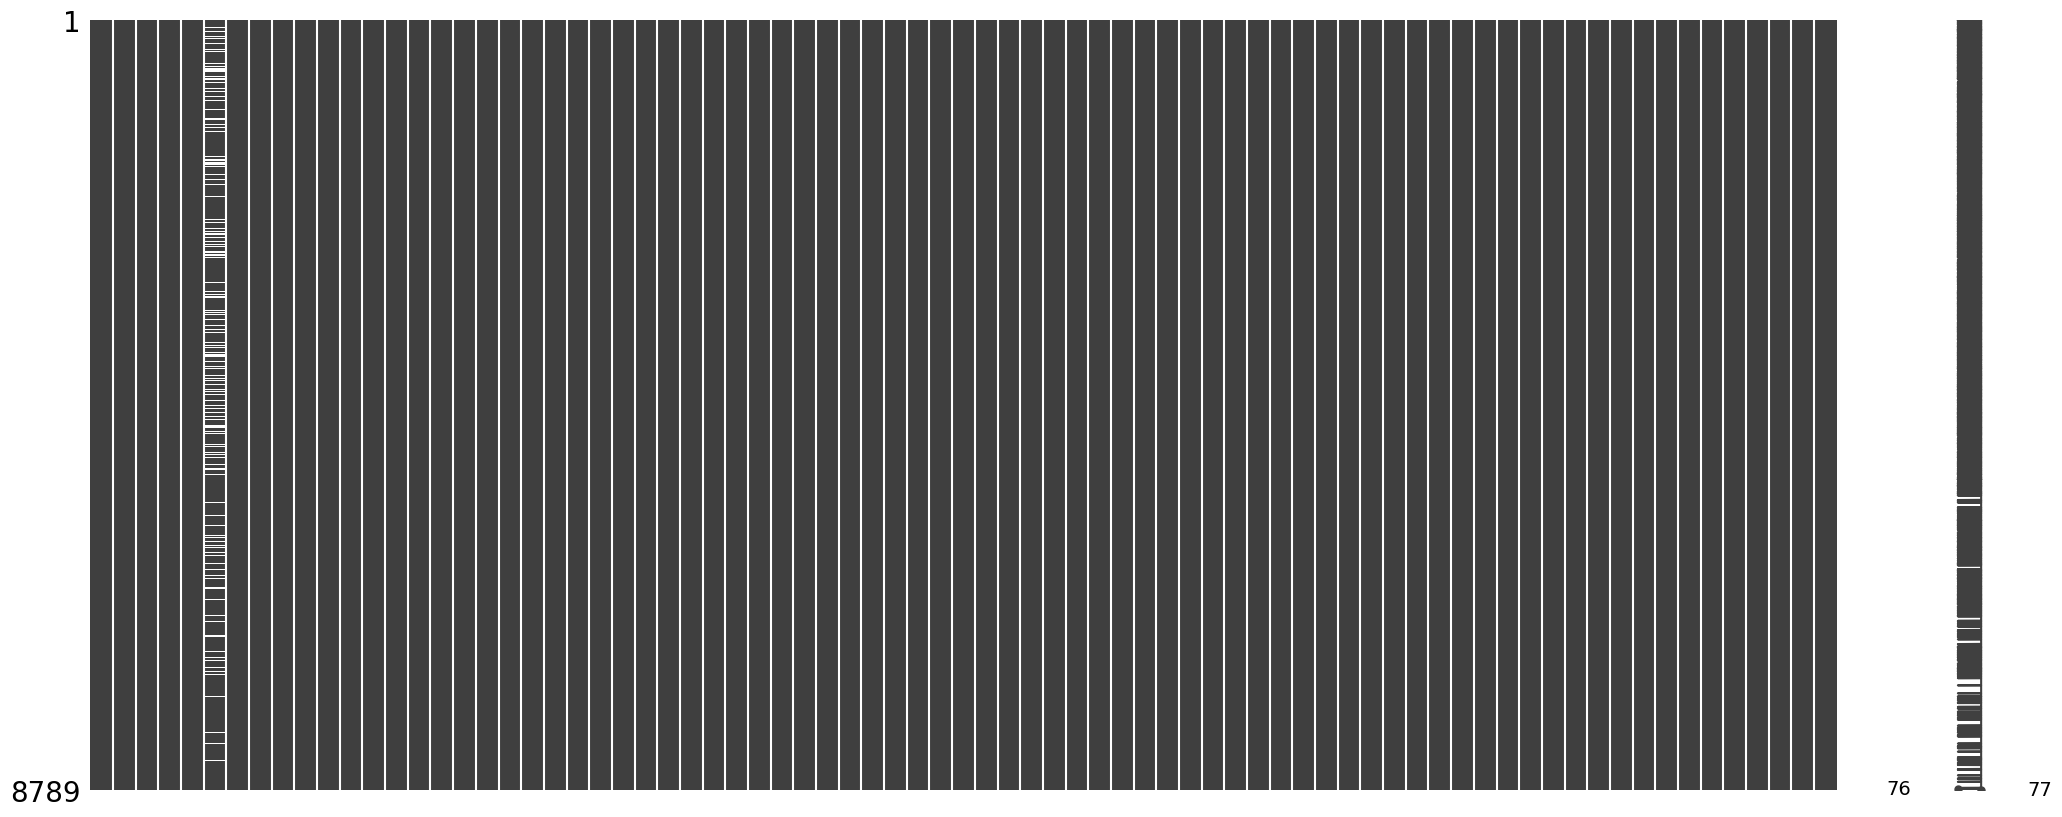

In [729]:
import missingno as msno
msno.matrix(nutrition)

#### duplicate rows
there are no duplicates. 

In [730]:
# check for duplicate rows
duplicate_rows = nutrition.duplicated().sum()
print("There are " + str(duplicate_rows) + " duplicate row(s).\n")

# get a boolean series indicating which rows are duplicates (including the original rows)
duplicate_mask = nutrition.duplicated(keep=False)

# use mask to filter and display both the original and duplicate rows
duplicate_rows_df = nutrition[duplicate_mask]
duplicate_rows_df

There are 0 duplicate row(s).



,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water


## data cleaning
- we know that most columns contain a mixture of numbers (for amounts) and units (g for grams, mg for milligrams, etc).   
- first, we check and see if the units in each column are similar to what we see in the dataset's .head() preview above, or if there are multiple units present in columns.  
- the result shows that no column contains more than one unit, but many also fall into the 'other' category. this could mean that there are other units we don't see in the .head(), or it could mean that there is no unit at all.  

In [731]:
# define a function which accepts input of a string containing a number (for the amount) plus a unit (g, mg, or mcg)
def check_unit(value):

    # first, convert each value to a string so the function can be applied
    # if a value is present (non-null), assign the string version of each value to `str_value`. if a null is encountered, an empty string is added
    str_value = str(value) if value is not None else ''

    # classify each string of letters into the following categories using `if` critera
    if 'g' in str_value:
        return 'g'          # returns "g", detecting the input is in grams
    elif 'mg' in str_value:
        return 'mg'         # returns "mg", detecting the input is in milligrams
    elif 'mcg' in str_value:
        return 'mcg'         # returns "mcg", detecting the input is in micrograms
    elif 't' in str_value:
        return 't'         # returns "t", detecting the input is a trace amount
    else:
        return 'other'      # returns "other", detecting the input is something else

# define an empty dictionary with which to store results
column_units = {}

# this nested `for` loop applies `check_unit` function to all items in a df
for column in nutrition.select_dtypes(include=['object', 'float']):       # iterates through columns in given dataframe
    units_in_column = set()     # initializes an empty set called `units_in_columms` (a set is used because it will automatically show duplicates only once)
    for value in nutrition[column]:        # then, the nested loop iterates thru the values in each column
        unit = check_unit(value)    # the `check_unit` function is called for each value
        units_in_column.add(unit)   # the result returned from `check_unit` is then stored in the set, `units_in_column`
    column_units[column] = units_in_column  # once the inner loop finishes, the units found are stored in the `column_units` dictionary with column names as keys

column_units  # the results are printed


{'name': {'g', 'other', 't'},
 'serving_size': {'g'},
 'total_fat': {'g'},
 'saturated_fat': {'g', 'other'},
 'cholesterol': {'g', 'other'},
 'sodium': {'g', 'other'},
 'choline': {'g', 'other'},
 'folate': {'g', 'other'},
 'folic_acid': {'g', 'other'},
 'niacin': {'g', 'other'},
 'pantothenic_acid': {'g', 'other'},
 'riboflavin': {'g', 'other'},
 'thiamin': {'g', 'other'},
 'vitamin_a': {'g', 'other'},
 'vitamin_a_rae': {'g', 'other'},
 'carotene_alpha': {'g', 'other'},
 'carotene_beta': {'g', 'other'},
 'cryptoxanthin_beta': {'g', 'other'},
 'lutein_zeaxanthin': {'g', 'other'},
 'vitamin_b12': {'g', 'other'},
 'vitamin_b6': {'g', 'other'},
 'vitamin_c': {'g', 'other'},
 'vitamin_d': {'other'},
 'vitamin_e': {'g', 'other'},
 'tocopherol_alpha': {'g', 'other'},
 'vitamin_k': {'g', 'other'},
 'calcium': {'g', 'other'},
 'copper': {'g', 'other'},
 'irom': {'g', 'other'},
 'magnesium': {'g', 'other'},
 'manganese': {'g', 'other'},
 'phosphorous': {'g', 'other'},
 'potassium': {'g', 'other

- to determine what 'other' means for each column, we will modify the function to filter for numeric values.  
- the resulting output shows that the 'other' category just meant that a value doesn't have any unit .  
- the output shows that columns fall into one of four situations:  
1. all values in the column are non-numeric. (`name` column)   
2. all values in the column are numeric. (`calories`, `lucopene`)  
3. all values in the column have some unit  
4. some values in the column have a unit, some are numeric-only. for the ones with unit, the unit is the same throughout the column. since we're not sure whether numeric-only just means the unit was forgotten or whether it indicates something in particular, we will keep this in mind when the time comes to analyze the data.  
5. some values in the column have a unit, some are missing (nan). for the ones with unit, the unit is the same throughout the column. (the only column this applies to is `saturated_fat`). 

In [732]:
# define a function which accepts input of a string containing a number (for the amount) plus a unit (g, mg, or mcg)
def check_unit(value):

    # first, convert each value to a string so the function can be applied
    # if a value is present (non-null), assign the string version of each value to `str_value`. if a null is encountered, an empty string is added
    str_value = str(value) if value is not None else ''
    
    # then, extract non-numeric information from each item in `str_value` and assign the result to `non_numeric`
    # the filter() tests each string using the lambda, which iterates thru the string and captures only non-digits and decimals ('.')
    # the outer method, ''.join(), concatenates any non-numeric characters found into one string
    # .strip() removes extra white spaces
    non_numeric = ''.join(filter(lambda x: not x.isdigit() and x != '.', str_value)).strip()
    return non_numeric if non_numeric else 'numeric'  # if `non_numeric` contains information it is returned; if it is empty, `numeric` is returned

# define an empty dictionary with which to store results
column_units = {}

# this nested `for` loop applies `check_unit` function to all items in a df
for column in nutrition.select_dtypes(include=['object', 'float', 'int']).columns:   # iterates through columns in given dataframe
    units_in_column = set()     # initializes an empty set called `units_in_columms` (a set is used because it will automatically show duplicates only once)
    for value in nutrition[column]:        # then, the nested loop iterates thru the values in each column
        unit = check_unit(value)    # the `check_unit` function is called for each value
        units_in_column.add(unit)   # the result returned from `check_unit` is then stored in the set, `units_in_column`
    column_units[column] = units_in_column  # once the inner loop finishes, the units found are stored in the `column_units` dictionary with column names as keys

column_units  # the results are printed

{'Unnamed: 0': {'numeric'},
 'name': {'Broccoli, without salt, drained, boiled, cooked, spears, frozen',
  'Cereals ready-to-eat, Wheat CHEX, GENERAL MILLS',
  'MURRAY, Oatmeal Cookies, SUGAR FREE',
  'Fish, dry heat, cooked, tilefish',
  'BURGER KING, with cheese, WHOPPER',
  'Potatoes, unprepared, plain, frozen, hash brown',
  'Pork, raw, separable lean and fat, composite of trimmed retail cuts (leg, loin, shoulder, and spareribs), fresh',
  'Bread, wheat',
  'Candies, GOOBERS Chocolate Covered Peanuts, NESTLE',
  'LITTLE CAESARS " Cheese Pizza, Thin Crust',
  'Bologna, pork',
  'Beverages, bottled, cranberry-grape juice drink',
  'Beef, raw, all grades, trimmed to /" fat, separable lean only, bone-in, t-bone steak, short loin',
  'Beverages, prepared with water, powder, breakfast type, orange-flavor drink',
  'Babyfood, vegetable, crackers',
  "Beverages, Hi-C Flashin' Fruit Punch, The COCA-COLA company",
  'SILK Blueberry soy yogurt',
  'Pork, roasted, cooked, boneless, separable l

- to make units more clear, we can add an argument to rename the columns with their unit appended.   
- it will avoid `name` column altogether because it contains no unit info  
- it will specify units for dictionary items with multiple entries by avoiding the strings `numeric` and `nan`  

In [733]:
# define a function which accepts input of a string containing a number (for the amount) plus a unit (g, mg, or mcg)
def check_unit(value):
    # first, convert each value to a string so the function can be applied
    # if a value is present (non-null), assign the string version of each value to `str_value`. if a null is encountered, an empty string is added
    str_value = str(value) if value is not None else ''
    
    # then, extract non-numeric information from each item in `str_value` and assign the result to `non_numeric`
    # the filter() tests each string using the lambda, which iterates thru the string and captures only non-digits and decimals ('.')
    # the outer method, ''.join(), concatenates any non-numeric characters found into one string
    # .strip() removes extra white spaces
    non_numeric = ''.join(filter(lambda x: not x.isdigit() and x != '.', str_value)).strip()
    return non_numeric if non_numeric else 'numeric'  # if `non_numeric` contains information it is returned; if it is empty, `numeric` is returned

# define an empty dictionary with which to store the differet resulting units, with column names as keys
column_units = {}
# defines an empty dictionary with which to store the new column names as values, with old column names as their keys
renamed_columns = {}

# this nested `for` loop applies `check_unit` function to all items in a df
for column in nutrition.select_dtypes(include=['object', 'float', 'int']).columns:   # iterates through columns in given dataframe
    if column == 'name':   # with the exception of `name`, which contains item descriptions
        continue            # tells the for loop to skip this column

    units_in_column = set()    # initializes an empty set called `units_in_columms` (a set is used because it will automatically show duplicates only once)
    
    # this inner loop will use the `check_unit` function on the values in columns
    for value in nutrition[column]:        # then, the nested loop iterates thru the values in each column
        unit = check_unit(value)    # the `check_unit` function is called for each value
        units_in_column.add(unit)   # the result returned from `check_unit` is then stored in the set, `units_in_column`
    column_units[column] = units_in_column  # once this inner loop finishes, the units found are stored in the `column_units` dictionary with column names as keys

    # use a list comprehension and 
    # create `units` list which is like `units_in_column` but leaves out 'numeric' and 'nan' items
    units = [u for u in units_in_column if u not in ['numeric', 'nan']]

    # for each item in `unit` list which is filled (not empty), rename the column with the present item
    if units:
        unit_to_add = units[0]  # grab the first (and only) unit
        new_column_name = f"{column}_{unit_to_add}"  # use constructor to append the unit's value to the column name in the format "_unit"
        renamed_columns[column] = new_column_name  # add the new column name as a value to each old column name key in the `renamed_columns` dictionary

nutrition.rename(columns=renamed_columns, inplace=True)  # carry out the renaming of the columns, using the `renamed_columns` dictionary as a mapping

nutrition.columns  # print the new column names

Index(['Unnamed: 0', 'name', 'serving_size_g', 'calories', 'total_fat_g',
       'saturated_fat_g', 'cholesterol_mg', 'sodium_mg', 'choline_mg',
       'folate_mcg', 'folic_acid_mcg', 'niacin_mg', 'pantothenic_acid_mg',
       'riboflavin_mg', 'thiamin_mg', 'vitamin_a_IU', 'vitamin_a_rae_mcg',
       'carotene_alpha_mcg', 'carotene_beta_mcg', 'cryptoxanthin_beta_mcg',
       'lutein_zeaxanthin_mcg', 'lucopene', 'vitamin_b12_mcg', 'vitamin_b6_mg',
       'vitamin_c_mg', 'vitamin_d_IU', 'vitamin_e_mg', 'tocopherol_alpha_mg',
       'vitamin_k_mcg', 'calcium_mg', 'copper_mg', 'irom_mg', 'magnesium_mg',
       'manganese_mg', 'phosphorous_mg', 'potassium_mg', 'selenium_mcg',
       'zink_mg', 'protein_g', 'alanine_g', 'arginine_g', 'aspartic_acid_g',
       'cystine_g', 'glutamic_acid_g', 'glycine_g', 'histidine_g',
       'hydroxyproline_g', 'isoleucine_g', 'leucine_g', 'lysine_g',
       'methionine_g', 'phenylalanine_g', 'proline_g', 'serine_g',
       'threonine_g', 'tryptophan_g', 'ty

- then, we can remove the units from the individual values, converting them to floats so the data can be analyzed.  

In [734]:
# iterate through columns in `nutrition`
for column in nutrition.columns:
    # detects columns with an understcore ("_"), which indicate possible presence of a newly appended unit
    if '_' in column:
        # to mitigate the multiple underscores in certain columns, this splits up these columns and stores each as a list of strings between underscores
        unit = column.split('_')[-1]  # the [-1] will select the last item in the list, as that is the appended unit

        # below, the column values are stripped of their units and converted to floats
        # values are converted to strings first using .astype(str)
        # the particular `unit` is found and replaced with a white space using str.replace(unit, '')
        # then the white space is stripped using str.strip()
        # finally the to_numeric() function converts strings to floats. errors='coerce' will ensure null values are set to 'NaN'
        nutrition[column] = pd.to_numeric(nutrition[column].astype(str).str.replace(unit, '').str.strip(), errors='coerce')

nutrition.head()  # check the results


,Unnamed: 0,name,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
0,0,Cornstarch,100,381,0.1,NaN,0,9.0,0.4,0.0,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,1,"Nuts, pecans",100,691,72.0,6.2,0,0.0,40.5,22.0,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,2,"Eggplant, raw",100,25,0.2,NaN,0,2.0,6.9,22.0,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,3,"Teff, uncooked",100,367,2.4,0.4,0,12.0,13.1,0.0,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,4,"Sherbet, orange",100,144,2.0,1.2,1,46.0,7.7,4.0,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


### Visualization

Total list:  
'name', 'serving_size_g', 'calories', 'total_fat_g',
'saturated_fat_g', 'cholesterol_mg', 'sodium_mg', 'choline_mg',
'folate_mcg', 'folic_acid_mcg', 'niacin_mg', 'pantothenic_acid_mg',
'riboflavin_mg', 'thiamin_mg', 'vitamin_a_IU', 'vitamin_a_rae_mcg',
'carotene_alpha_mcg', 'carotene_beta_mcg', 'cryptoxanthin_beta_mcg',
'lutein_zeaxanthin_mcg', 'lucopene', 'vitamin_b12_mcg', 'vitamin_b6_mg',
'vitamin_c_mg', 'vitamin_d_IU', 'vitamin_e_mg', 'tocopherol_alpha_mg',
'vitamin_k_mcg', 'calcium_mg', 'copper_mg', 'irom_mg', 'magnesium_mg',
'manganese_mg', 'phosphorous_mg', 'potassium_mg', 'selenium_mcg',
'zink_mg', 'protein_g', 'alanine_g', 'arginine_g', 'aspartic_acid_g',
'cystine_g', 'glutamic_acid_g', 'glycine_g', 'histidine_g',
'hydroxyproline_g', 'isoleucine_g', 'leucine_g', 'lysine_g',
'methionine_g', 'phenylalanine_g', 'proline_g', 'serine_g',
'threonine_g', 'tryptophan_g', 'tyrosine_g', 'valine_g',
'carbohydrate_g', 'fiber_g', 'sugars_g', 'fructose_g', 'galactose_g',
'glucose_g', 'lactose_g', 'maltose_g', 'sucrose_g', 'fat_g',
'saturated_fatty_acids_g', 'monounsaturated_fatty_acids_g',
'polyunsaturated_fatty_acids_g', 'fatty_acids_total_trans_mg',
'alcohol_g', 'ash_g', 'caffeine_mg', 'theobromine_mg', 'water_g'

~'name'~, 'serving_size_g', 'calories', 'total_fat_g',
'saturated_fat_g', 'cholesterol_mg', 'sodium_mg', 'choline_mg',
'folate_mcg', 'folic_acid_mcg', 'niacin_mg', 'pantothenic_acid_mg',
'riboflavin_mg', 'thiamin_mg', 'vitamin_a_IU', 'vitamin_a_rae_mcg',
'carotene_alpha_mcg', 'carotene_beta_mcg', 'cryptoxanthin_beta_mcg',
'lutein_zeaxanthin_mcg', 'lucopene', 'vitamin_b12_mcg', 'vitamin_b6_mg',
'vitamin_c_mg', 'vitamin_d_IU', 'vitamin_e_mg', 'tocopherol_alpha_mg',
'vitamin_k_mcg', 'calcium_mg', 'copper_mg', 'irom_mg', 'magnesium_mg',
'manganese_mg', 'phosphorous_mg', 'potassium_mg', 'selenium_mcg',
'zink_mg', 'protein_g', 'alanine_g', 'arginine_g', 'aspartic_acid_g',
'cystine_g', 'glutamic_acid_g', 'glycine_g', 'histidine_g',
'hydroxyproline_g', 'isoleucine_g', 'leucine_g', 'lysine_g',
'methionine_g', 'phenylalanine_g', 'proline_g', 'serine_g',
'threonine_g', 'tryptophan_g', 'tyrosine_g', 'valine_g',
'carbohydrate_g', 'fiber_g', 'sugars_g', 'fructose_g', 'galactose_g',
'glucose_g', 'lactose_g', 'maltose_g', 'sucrose_g', 'fat_g',
'saturated_fatty_acids_g', 'monounsaturated_fatty_acids_g',
'polyunsaturated_fatty_acids_g', 'fatty_acids_total_trans_mg',
'alcohol_g', 'ash_g', 'caffeine_mg', 'theobromine_mg', 'water_g'

**Serving information/other:**
`name`

**Macronutrients:**  
`carbohydrate_g`  
`protein_g`  
`total_fat_g`  


#### Macronutrients:  
**`carbohydrate_g`**
**`protein_g`**
**`total_fat_g`**

Text(0, 0.5, 'Number of meals')

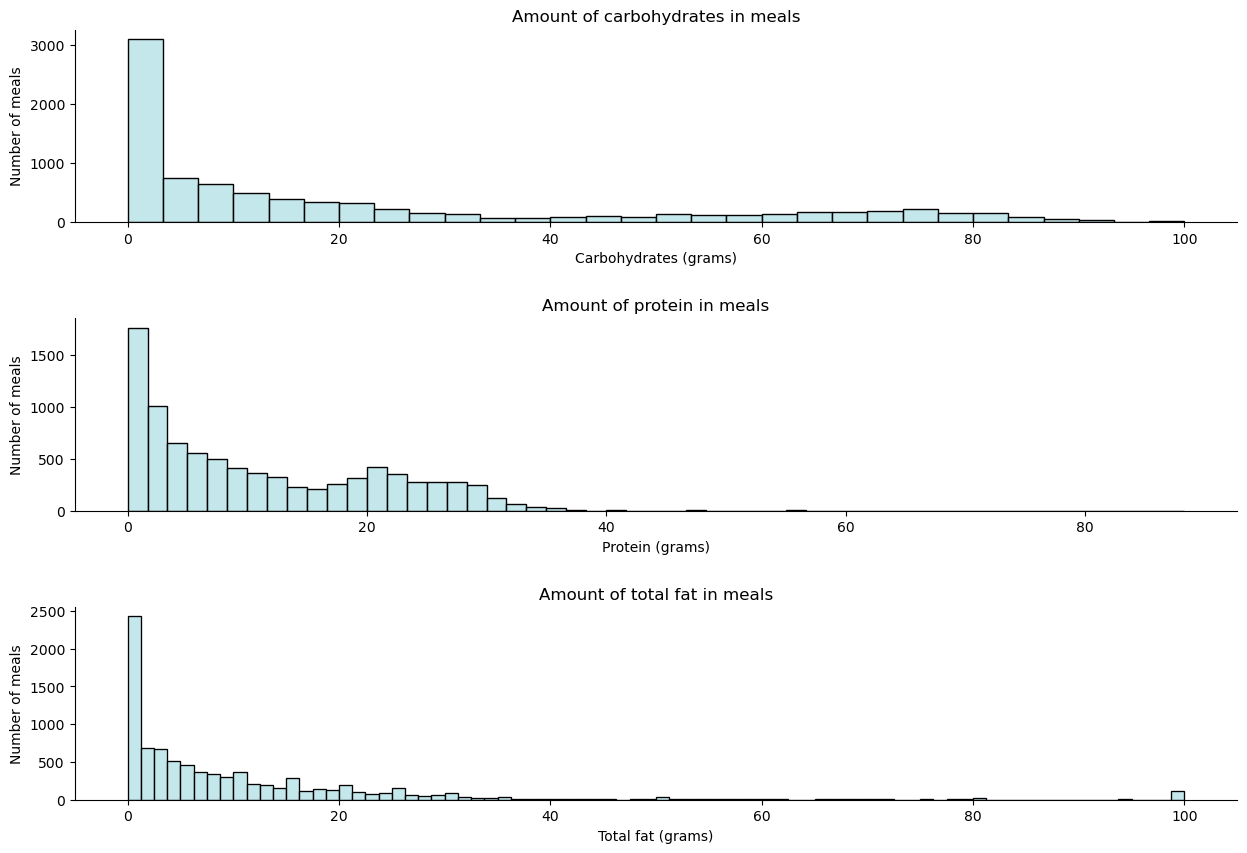

In [735]:
import matplotlib.pyplot as plt
import seaborn as sns

# 
f, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine(f)

# 
sns.histplot(x='carbohydrate_g', data=nutrition, ax=ax[0], color='powderblue')
ax[0].set_title('Amount of carbohydrates in meals')
ax[0].set_xlabel('Carbohydrates (grams)')
ax[0].set_ylabel('Number of meals')

# 
sns.histplot(x='protein_g', data=nutrition, ax=ax[1], color='powderblue')
ax[1].set_title('Amount of protein in meals')
ax[1].set_xlabel('Protein (grams)')
ax[1].set_ylabel('Number of meals')

# 
sns.histplot(x='total_fat_g', data=nutrition, ax=ax[2], color='powderblue')
ax[2].set_title('Amount of total fat in meals')
ax[2].set_xlabel('Total fat (grams)')
ax[2].set_ylabel('Number of meals')

Text(0, 0.5, 'Number of meals')

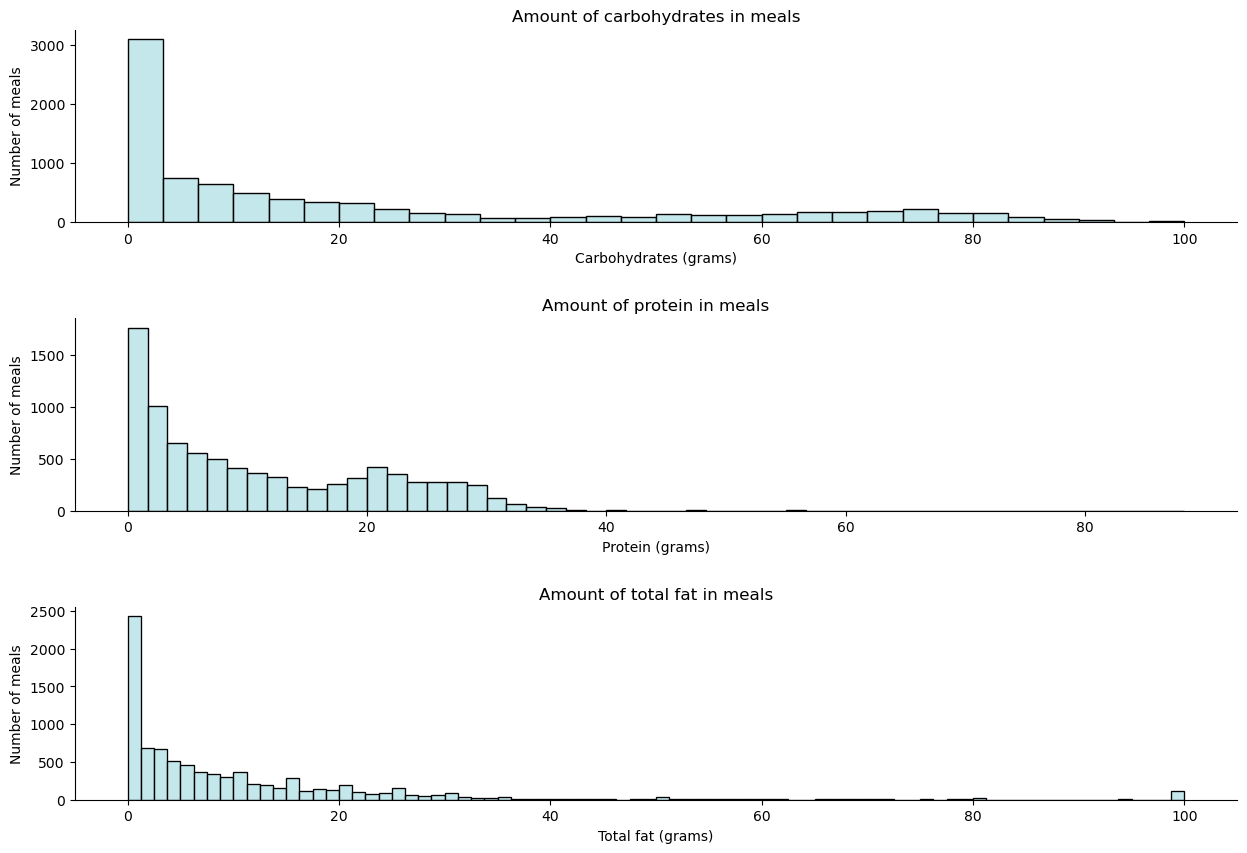

In [736]:
# 
f, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine(f)

# 
sns.histplot(x='carbohydrate_g', data=nutrition, ax=ax[0], color='powderblue')
ax[0].set_title('Amount of carbohydrates in meals')
ax[0].set_xlabel('Carbohydrates (grams)')
ax[0].set_ylabel('Number of meals')

# 
sns.histplot(x='protein_g', data=nutrition, ax=ax[1], color='powderblue')
ax[1].set_title('Amount of protein in meals')
ax[1].set_xlabel('Protein (grams)')
ax[1].set_ylabel('Number of meals')

# 
sns.histplot(x='total_fat_g', data=nutrition, ax=ax[2], color='powderblue')
ax[2].set_title('Amount of total fat in meals')
ax[2].set_xlabel('Total fat (grams)')
ax[2].set_ylabel('Number of meals')

In [737]:
corr_matrix = nutrition.corr(numeric_only=True)
corr_matrix

,Unnamed: 0,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
Unnamed: 0,1.000000,NaN,-0.048733,0.008651,-0.002699,0.093627,-0.089095,0.142386,-0.046671,0.015567,...,0.008765,0.040757,0.038787,-0.081735,0.093627,-0.012403,-0.095457,-0.008039,-0.012737,0.105715
serving_size_g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calories,-0.048733,NaN,1.000000,0.806574,0.613212,0.015153,0.055405,0.038763,0.183767,0.137879,...,0.806604,0.619234,0.676905,0.595029,0.015153,-0.019040,0.083166,0.022809,0.080254,-0.900508
total_fat_g,0.008651,NaN,0.806574,1.000000,0.759576,0.087367,0.011999,0.048945,-0.049146,-0.047441,...,0.999946,0.764654,0.868758,0.703909,0.087367,-0.047493,-0.006022,-0.010849,0.040615,-0.489463
saturated_fat_g,-0.002699,NaN,0.613212,0.759576,1.000000,0.056382,-0.013882,0.002631,-0.095894,-0.064756,...,0.759604,0.999905,0.487140,0.231214,0.056382,-0.005465,-0.058346,0.004513,0.074993,-0.334703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
alcohol_g,-0.012403,NaN,-0.019040,-0.047493,-0.005465,-0.023749,-0.023242,-0.033003,-0.024977,-0.012862,...,-0.047504,-0.036870,-0.039878,-0.030447,-0.023749,1.000000,-0.039008,-0.001165,-0.005658,0.039236
ash_g,-0.095457,NaN,0.083166,-0.006022,-0.058346,-0.006371,0.812560,0.069124,0.117668,0.081507,...,-0.006052,-0.023549,-0.001892,0.016433,-0.006371,-0.039008,1.000000,0.074368,0.046895,-0.235699
caffeine_mg,-0.008039,NaN,0.022809,-0.010849,0.004513,-0.009952,-0.005986,0.026219,-0.000549,-0.004257,...,-0.010846,-0.003845,-0.011310,-0.011379,-0.009952,-0.001165,0.074368,1.000000,0.066296,-0.046548
theobromine_mg,-0.012737,NaN,0.080254,0.040615,0.074993,-0.021517,-0.002841,0.003032,0.002385,0.009355,...,0.040438,0.080162,0.019008,-0.006499,-0.021517,-0.005658,0.046895,0.066296,1.000000,-0.109744


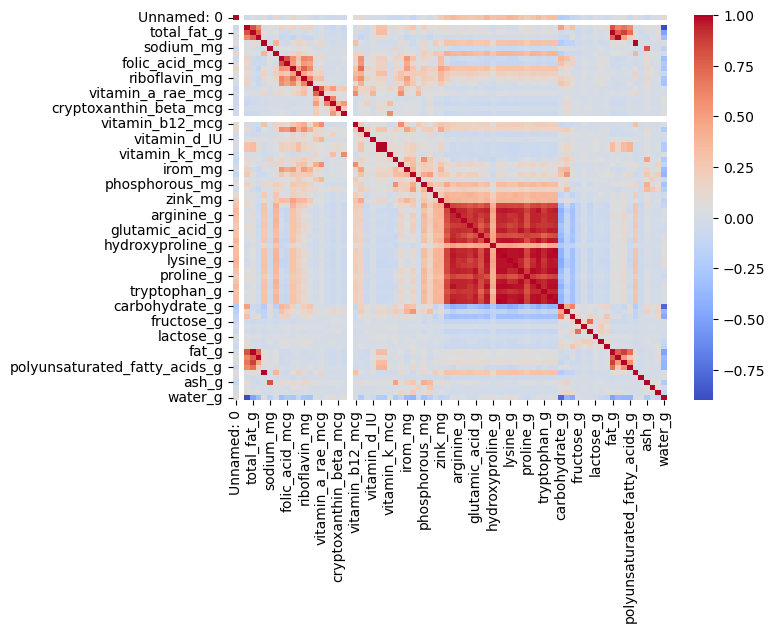

In [738]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the heatmap
plt.figure(figsize=(7, 5))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', annot_kws={"size": 6})
plt.show()

Text(0, 0.5, '')

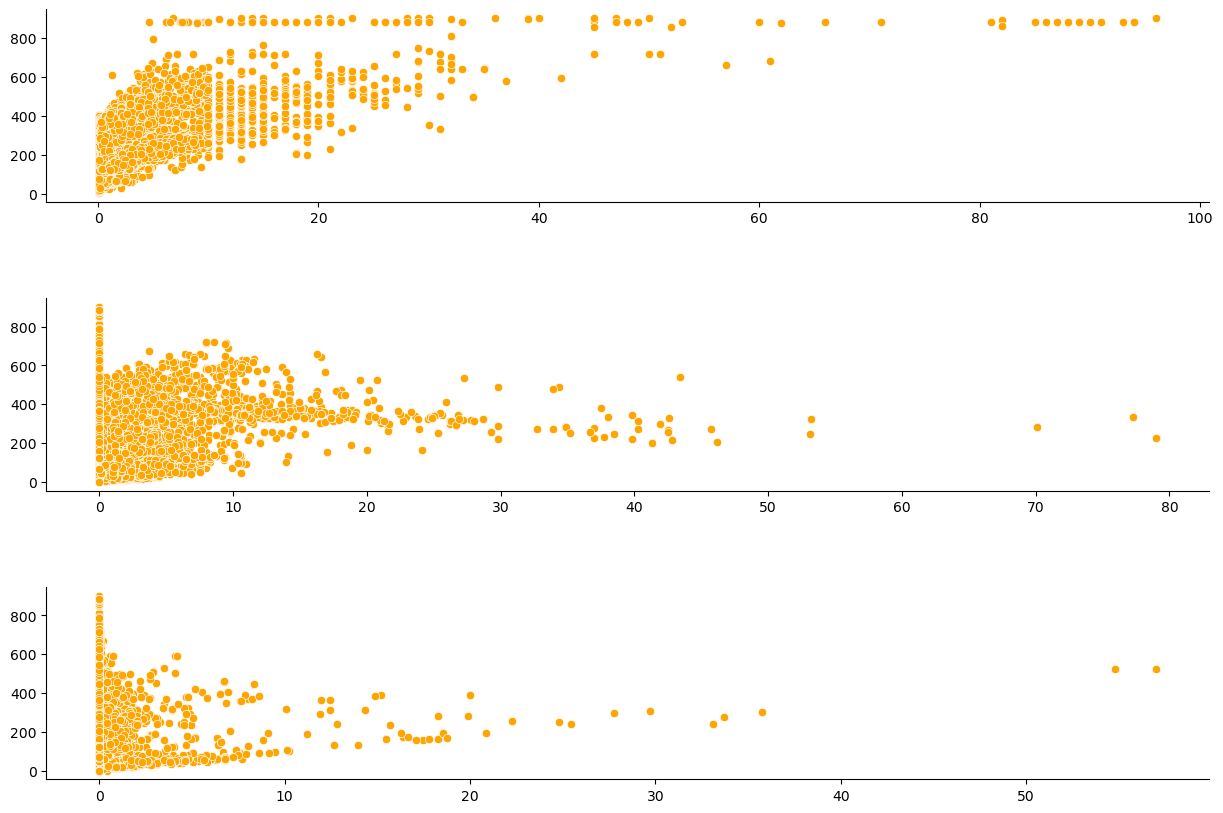

In [739]:
# 
f, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine(f)

# 
sns.scatterplot(x='saturated_fat_g', y='calories', data=nutrition, ax=ax[0], color='orange')
ax[0].set_title('')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

# 
sns.scatterplot(x='fiber_g', y='calories', data=nutrition, ax=ax[1], color='orange')
ax[1].set_title('')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

# 
sns.scatterplot(x='glucose_g', y='calories', data=nutrition, ax=ax[2], color='orange')
ax[2].set_title('')
ax[2].set_xlabel('')
ax[2].set_ylabel('')

### Categorization
use regex to find keywords in `name` and categorize into 5 food groups defined by USDA: Fruit, Vegetables, Grain, Protein, Dairy  

breakdown:   
Fruit group  
- Fruit  
- Fruit Juice  **will be eliminated because not useful    

Vegetable group  
- Dark green vegetables   
- Red/Orange vegetables  
- Beans/Peas  
- Starchy vegetables  
- Other vegetables  

Grain group  
- Whole grain  
- Refined grain  

Protein group  
- Meat/poultry/eggs  
- Seafood  
- Nuts/seeds/soy  

Dairy group  
- Milk/yogurt  
- Cheese  

In [740]:
# convert `name` to lowercase so searches aren't case-sensitive
nutrition['name'] = nutrition['name'].str.lower()

#### add columns for `contains_fruit_group` and its subgroups

In [741]:
import re   # import re for regex
# define a regex pattern for common fruits
fruit_pattern = re.compile(r'(apple|banana|orange|strawberry|blueberry|raspberry|grape|kiwi|mango|pineapple|pear|peach|plum|cherry|watermelon|cantaloupe|lemon|lime|grapefruit|pomegranate|apricot|fig|coconut|avocado|blackberry|cranberry|date|elderberry|guava|kiwifruit|lychee|papaya|passion\sfruit|tangerine)')
# define a regex pattern for fruit juices
fruit_juice_pattern = re.compile(r'(apple\sjuice|orange\sjuice|grape\sjuice|pineapple\sjuice|lemon\sjuice|lime\sjuice|mango\sjuice|papaya\sjuice|guava\sjuice|strawberry\sjuice|blueberry\sjuice|raspberry\sjuice|blackberry\sjuice|cranberry\sjuice|cherry\sjuice|peach\sjuice|pear\sjuice|grapefruit\sjuice|pomegranate\sjuice|kiwi\sjuice|watermelon\sjuice)')

# define the function to categorize the fruit group
def contains_fruit_group(item):
    if fruit_pattern.search(item) or fruit_juice_pattern.search(item):  # if `name` contains one of the common fruits or fruit juices
        return True
    else:  
        return False

# define function to categorize the fruit subgroup
def contains_fruit(item):
    if fruit_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the fruit juice subgroup
def contains_fruit_juice(item):
    if fruit_juice_pattern.search(item):
        return True
    else:
        return False


# apply to `name` and create new columns with results
nutrition['contains_fruit_group'] = nutrition['name'].apply(contains_fruit_group)
nutrition['contains_fruit'] = nutrition['name'].apply(contains_fruit)
nutrition['contains_fruit_juice'] = nutrition['name'].apply(contains_fruit_juice)

#### add columns for `contains_vegetable_group` and its subgroups

In [742]:
# define regex patterns for different vegetable subgroups
dark_green_vegetables_pattern = re.compile(r'(spinach|kale|collard\sgreens|mustard\sgreens|swiss\schard|turnip\sgreens|seaweed|bok\schoy|broccoli|rabe|arugula|watercress)')
red_orange_vegetables_pattern = re.compile(r'(carrot|pumpkin|sweet\spotato|red\spepper|orange\spepper|butternut\ssquash|acorn\ssquash|tomato|beet|red\sonion)')
beans_peas_pattern = re.compile(r'(black\sbeans|kidney\sbeans|pinto\sbeans|navy\sbeans|chickpeas|lentils|split\speas|green\speas|black-eyed\speas|lima\sbeans)')
starchy_vegetables_pattern = re.compile(r'(potato|corn|green\speas|butternut\ssquash|acorn\ssquash|pumpkin|plantain|yam|taro|cassava)')
other_vegetables_pattern = re.compile(r'(cucumber|bell\spepper|zucchini|squash|eggplant|lettuce|celery|cabbage|brussels\ssprouts|cauliflower|artichoke|asparagus|radish)')

# define the function to categorize the vegetable group
def contains_vegetable_group(item):
    if dark_green_vegetables_pattern.search(item) or red_orange_vegetables_pattern.search(item) or beans_peas_pattern.search(item) or starchy_vegetables_pattern.search(item) or other_vegetables_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the dark green vegetables subgroup
def contains_dark_green_vegetables(item):
    if dark_green_vegetables_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the red/orange vegetables subgroup
def contains_red_orange_vegetables(item):
    if red_orange_vegetables_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the beans/peas subgroup
def contains_beans_peas(item):
    if beans_peas_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the starchy vegetables subgroup
def contains_starchy_vegetables(item):
    if starchy_vegetables_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the other vegetables subgroup
def contains_other_vegetables(item):
    if other_vegetables_pattern.search(item):
        return True
    else:
        return False

# apply the functions to `name` and create new columns with results
nutrition['contains_vegetable_group'] = nutrition['name'].apply(contains_vegetable_group)
nutrition['contains_dark_green_vegetables'] = nutrition['name'].apply(contains_dark_green_vegetables)
nutrition['contains_red_orange_vegetables'] = nutrition['name'].apply(contains_red_orange_vegetables)
nutrition['contains_beans_peas'] = nutrition['name'].apply(contains_beans_peas)
nutrition['contains_starchy_vegetables'] = nutrition['name'].apply(contains_starchy_vegetables)
nutrition['contains_other_vegetables'] = nutrition['name'].apply(contains_other_vegetables)

#### add `contains_grain_group` column

In [743]:
# define regex patterns for grain subgroups
whole_grain_pattern = re.compile(r'(whole\swheat\sbread|brown\srice|popcorn|oatmeal|quinoa|wild\srice|bulgur|buckwheat|barley|millets|sorghum|whole\srice|whole\swheat\spasta|whole\swheat\tortillas|rye\sbread|whole\swheat\sbagels|spelt|amaranth|teff|triticale|whole\swheat\senglish\smuffins|whole\swheat\spretzels)')
refined_grain_pattern = re.compile(r'(white\sbread|white\srice|pretzels|english\smuffins|corn\stortilla|grits|regular\spasta|bagels|crackers|noodles|pancakes|waffles|white\sflour\stortillas|croissants|pita\sbread|refined\scereal|refined\swheat\sflour|refined\soat\sproducts|refined\sbarley\sproducts|refined\scorn\sproducts)')

# define the function to categorize the grain group
def contains_grain_group(item):
    if whole_grain_pattern.search(item) or refined_grain_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the whole grain subgroup
def contains_whole_grain(item):
    if whole_grain_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the refined grain subgroup
def contains_refined_grain(item):
    if refined_grain_pattern.search(item):
        return True
    else:
        return False

# apply the functions to `name` and new columns to store results
nutrition['contains_grain_group'] = nutrition['name'].apply(contains_grain_group)
nutrition['contains_whole_grain'] = nutrition['name'].apply(contains_whole_grain)
nutrition['contains_refined_grain'] = nutrition['name'].apply(contains_refined_grain)

#### add `contains_protein_group` column

In [747]:
# define regex patterns for different protein subgroups
seafood_pattern = re.compile(r'(fish|shark|tuna|salmon|trout|mackerel|sardine|anchovy|cod|tilapia|halibut|catfish|snapper|swordfish|bass|grouper|perch|sole|flounder|crab|lobster|shrimp|prawn|clam|oyster|mussel|scallop|squid|octopus|crayfish|eel)')
meat_poultry_eggs_pattern = re.compile(r'(beef|pork|chicken|lamb|turkey|veal|venison|bison|duck|goose|rabbit|quail|pheasant|ostrich|elk|kangaroo|boar|horse|emu|camel|goat|alligator|turtle|frog|snail|crayfish|muskrat|raccoon|possum|armadillo|skunk|beaver|woodchuck|buffalo|moose|caribou|guinea\spig|pigeon|partridge|grouse|cornish\shen|turducken|goose\s?egg|duck\s?egg|chicken\s?egg|quail\s?egg|ostrich\s?egg|emu\s?egg)')
nuts_seeds_soy_pattern = re.compile(r'(almond|cashew|pecan|walnut|peanut|hazelnut|macadamia|pine\snut|pistachio|sunflower\sseeds|pumpkin\sseeds|flaxseeds|chia\sseeds|hemp\sseeds|sesame\sseeds|soybean|soy\sproducts|tofu|tempeh)')

# define the function to categorize the protein group
def contains_protein_group(item):
    if seafood_pattern.search(item) or meat_poultry_eggs_pattern.search(item) or nuts_seeds_soy_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the meat/poultry/eggs subgroup
def contains_meat_poultry_eggs(item):
    if meat_poultry_eggs_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the seafood subgroup
def contains_seafood(item):
    if seafood_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the nuts/seeds/soy subgroup
def contains_nuts_seeds_soy(item):
    if nuts_seeds_soy_pattern.search(item):
        return True
    else:
        return False

# apply the functions to `name` and new columns to store results
nutrition['contains_protein_group'] = nutrition['name'].apply(contains_protein_group)
nutrition['contains_meat_poultry_eggs'] = nutrition['name'].apply(contains_meat_poultry_eggs)
nutrition['contains_seafood'] = nutrition['name'].apply(contains_seafood)
nutrition['contains_nuts_seeds_soy'] = nutrition['name'].apply(contains_nuts_seeds_soy)

#### add `contains_dairy_group` column

In [755]:
# define regex patterns for dairy subgroups
milk_yogurt_pattern = re.compile(
    r'\b(whole milk|skimmed milk|semi-skimmed milk|2% milk|1% milk|fat-free milk|lactose-free milk|almond milk|soy milk|oat milk|rice milk|coconut milk|goat milk|buffalo milk|'
    r'yogurt|greek yogurt|plain yogurt|flavored yogurt|low-fat yogurt|full-fat yogurt|non-fat yogurt|probiotic yogurt|fruit yogurt|'
    r'infant formula|baby formula|toddler formula|formula milk|soy formula|lactose-free formula|hydrolyzed formula|hypoallergenic formula|organic baby formula|iron-fortified formula|goat milk formula)\b')
cheese_pattern = re.compile(r'\b(cheddar|gouda|brie|camembert|mozzarella|parmesan|feta|blue cheese|gorgonzola|roquefort|emmental|swiss cheese|monterey jack|provolone|ricotta|cottage cheese|cream cheese|colby|edam|goat cheese|pepper jack|asiago|manchego|halloumi|havarti|stilton)\b')

# define the function to categorize the dairy group
def contains_dairy_group(item):
    if milk_yogurt_pattern.search(item) or cheese_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the milk/yogurt subgroup
def contains_milk_yogurt(item):
    if milk_yogurt_pattern.search(item):
        return True
    else:
        return False

# define function to categorize the cheese subgroup
def contains_cheese(item):
    if cheese_pattern.search(item):
        return True
    else:
        return False

# apply the functions to `name` and new columns to store results
nutrition['contains_dairy_group'] = nutrition['name'].apply(contains_dairy_group)
nutrition['contains_milk_yogurt'] = nutrition['name'].apply(contains_milk_yogurt)
nutrition['contains_cheese'] = nutrition['name'].apply(contains_cheese)

### Create `food_group` column to compile all food group categories into one column
food group can be one of three categories:  
1. single-group (`name` contains food from only one group)  
2. dual-group (`name` contains food from two groups)  
3. triple-group (`name` contains food from 3 groups)  

In [765]:
# define function to compile results of previously created columns
def food_group(item):
    # Check for single group categorization
    if contains_fruit_group(item) and not (contains_vegetable_group(item) or contains_grain_group(item) or contains_protein_group(item) or contains_dairy_group(item)):
        return 'Fruit'
    elif contains_vegetable_group(item) and not (contains_fruit_group(item) or contains_grain_group(item) or contains_protein_group(item) or contains_dairy_group(item)):
        return 'Vegetable'
    elif contains_grain_group(item) and not (contains_fruit_group(item) or contains_vegetable_group(item) or contains_protein_group(item) or contains_dairy_group(item)):
        return 'Grain'
    elif contains_protein_group(item) and not (contains_fruit_group(item) or contains_vegetable_group(item) or contains_grain_group(item) or contains_dairy_group(item)):
        return 'Protein'
    elif contains_dairy_group(item) and not (contains_fruit_group(item) or contains_vegetable_group(item) or contains_grain_group(item) or contains_protein_group(item)):
        return 'Dairy'

    # Check for dual group categorization
    elif contains_fruit_group(item) and contains_vegetable_group(item) and not (contains_grain_group(item) or contains_protein_group(item) or contains_dairy_group(item)):
        return 'Fruit and Vegetable'
    elif contains_fruit_group(item) and contains_grain_group(item) and not (contains_vegetable_group(item) or contains_protein_group(item) or contains_dairy_group(item)):
        return 'Fruit and Grain'
    elif contains_fruit_group(item) and contains_protein_group(item) and not (contains_vegetable_group(item) or contains_grain_group(item) or contains_dairy_group(item)):
        return 'Fruit and Protein'
    elif contains_fruit_group(item) and contains_dairy_group(item) and not (contains_vegetable_group(item) or contains_grain_group(item) or contains_protein_group(item)):
        return 'Fruit and Dairy'
    
    elif contains_vegetable_group(item) and contains_grain_group(item) and not (contains_fruit_group(item) or contains_protein_group(item) or contains_dairy_group(item)):
        return 'Vegetable and Grain'
    elif contains_vegetable_group(item) and contains_protein_group(item) and not (contains_fruit_group(item) or contains_grain_group(item) or contains_dairy_group(item)):
        return 'Vegetable and Protein'
    elif contains_vegetable_group(item) and contains_dairy_group(item) and not (contains_fruit_group(item) or contains_grain_group(item) or contains_protein_group(item)):
        return 'Vegetable and Dairy'
    
    elif contains_grain_group(item) and contains_protein_group(item) and not (contains_fruit_group(item) or contains_vegetable_group(item) or contains_dairy_group(item)):
        return 'Grain and Protein'
    elif contains_grain_group(item) and contains_dairy_group(item) and not (contains_fruit_group(item) or contains_vegetable_group(item) or contains_protein_group(item)):
        return 'Grain and Dairy'

    elif contains_protein_group(item) and contains_dairy_group(item) and not (contains_fruit_group(item) or contains_vegetable_group(item) or contains_grain_group(item)):
        return 'Protein and Dairy'

    # Check for triple group 
    elif contains_fruit_group(item) and contains_vegetable_group(item) and contains_grain_group(item) and not (contains_protein_group(item) or contains_dairy_group(item)):
        return 'Fruit, Vegetable, Grain'
    elif contains_fruit_group(item) and contains_vegetable_group(item) and contains_protein_group(item) and not (contains_grain_group(item) or contains_dairy_group(item)):
        return 'Fruit, Vegetable, Protein'
    elif contains_fruit_group(item) and contains_vegetable_group(item) and contains_dairy_group(item) and not (contains_grain_group(item) or contains_protein_group(item)):
        return 'Fruit, Vegetable, Dairy'
    
    elif contains_fruit_group(item) and contains_grain_group(item) and contains_protein_group(item) and not (contains_vegetable_group(item) or contains_dairy_group(item)):
        return 'Fruit, Grain, Protein'
    elif contains_fruit_group(item) and contains_grain_group(item) and contains_dairy_group(item) and not (contains_vegetable_group(item) or contains_protein_group(item)):
        return 'Fruit, Grain, Dairy'

    elif contains_vegetable_group(item) and contains_grain_group(item) and contains_protein_group(item) and not (contains_fruit_group(item) or contains_dairy_group(item)):
        return 'Vegetable, Grain, Protein'
    elif contains_vegetable_group(item) and contains_grain_group(item) and contains_dairy_group(item) and not (contains_fruit_group(item) or contains_protein_group(item)):
        return 'Vegetable, Grain, Dairy'

    elif contains_vegetable_group(item) and contains_protein_group(item) and contains_dairy_group(item) and not (contains_fruit_group(item) or contains_grain_group(item)):
        return 'Vegetable, Protein, Dairy'

    elif contains_grain_group(item) and contains_protein_group(item) and contains_dairy_group(item) and not (contains_fruit_group(item) or contains_vegetable_group(item)):
        return 'Grain, Protein, Dairy'

    # all other cases
    else:
        return '4+ or None'

# Example usage
nutrition['food_group'] = nutrition['name'].apply(food_group)
nutrition


,Unnamed: 0,name,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,...,contains_refined_grain,contains_protein_group,contains_meat_poultry_eggs,contains_seafood,contains_nuts_seeds_soy,contains_dairy_group,contains_milk_yogurt,contains_cheese,true_count,food_group
0,0,cornstarch,100,381,0.1,NaN,0,9.0,0.4,0.0,...,False,False,False,False,False,False,False,False,1,Vegetable
1,1,"nuts, pecans",100,691,72.0,6.2,0,0.0,40.5,22.0,...,False,True,False,False,True,False,False,False,1,Protein
2,2,"eggplant, raw",100,25,0.2,NaN,0,2.0,6.9,22.0,...,False,False,False,False,False,False,False,False,1,Vegetable
3,3,"teff, uncooked",100,367,2.4,0.4,0,12.0,13.1,0.0,...,False,False,False,False,False,False,False,False,1,Grain
4,4,"sherbet, orange",100,144,2.0,1.2,1,46.0,7.7,4.0,...,False,False,False,False,False,False,False,False,1,Fruit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,8784,"beef, raw, all grades, trimmed to 0"" fat, sepa...",100,125,3.5,1.4,62,54.0,64.5,4.0,...,False,True,True,False,False,False,False,False,1,Protein
8785,8785,"lamb, cooked, separable lean only, composite o...",100,206,8.9,3.9,109,50.0,0.0,0.0,...,False,True,True,False,False,False,False,False,1,Protein
8786,8786,"lamb, raw, separable lean and fat, composite o...",100,277,23.0,12.0,78,39.0,0.0,1.0,...,False,True,True,False,False,False,False,False,1,Protein
8787,8787,"beef, raw, all grades, trimmed to 0"" fat, sepa...",100,121,3.0,1.1,60,53.0,64.2,4.0,...,False,True,True,False,False,False,False,False,1,Protein


### Create `subgroup` column to compile all food subgroup categories into one column
subgroups include:  
1.  

In [766]:
def subgroup(item):
    # Check for single group categorization
    # Fruit group
    if contains_fruit_group(item) and not (contains_vegetable_group(item) or contains_grain_group(item) or contains_protein_group(item) or contains_dairy_group(item)):
        if contains_fruit(item) and not (contains_fruit_juice(item)):
            return 'Fruit'
        elif contains_fruit_juice(item) and not (contains_fruit(item)):
            return 'Fruit Juice'
    # Vegetable group
    elif contains_vegetable_group(item) and not (contains_fruit_group(item) or contains_grain_group(item) or contains_protein_group(item) or contains_dairy_group(item)):
        if contains_dark_green_vegetables(item) and not (contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_other_vegetables(item)):
            return 'Dark Green Vegetables'
        elif contains_red_orange_vegetables(item) and not (contains_dark_green_vegetables(item) or contains_beans_peas(item) or contains_other_vegetables(item)):
            return 'Red/Orange Vegetables'
        elif contains_beans_peas(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_other_vegetables(item)):
            return 'Beans/Peas'
        elif contains_other_vegetables(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item)):
            return 'Other Vegetables'
    # Grain group
    elif contains_grain_group(item) and not (contains_fruit_group(item) or contains_vegetable_group(item) or contains_protein_group(item) or contains_dairy_group(item)):
        if contains_whole_grain(item) and not (contains_refined_grain(item)):
            return 'Whole Grain'
        elif contains_refined_grain(item) and not (contains_whole_grain(item)):
            return 'Refined Grain'
    # Protein group
    elif contains_protein_group(item) and not (contains_fruit_group(item) or contains_vegetable_group(item) or contains_grain_group(item) or contains_dairy_group(item)):
        if contains_meat_poultry_eggs(item) and not (contains_seafood(item) or contains_nuts_seeds_soy(item)):
            return 'Meat/Poultry/Eggs'
        elif contains_seafood(item) and not (contains_meat_poultry_eggs(item) or contains_nuts_seeds_soy(item)):
            return 'Seafood'
        elif contains_nuts_seeds_soy(item) and not (contains_meat_poultry_eggs(item) or contains_seafood(item)):
            return 'Nuts/Seeds/Soy'
    # Dairy group
    elif contains_dairy_group(item) and not (contains_fruit_group(item) or contains_vegetable_group(item) or contains_grain_group(item) or contains_protein_group(item)):
        if contains_milk_yogurt(item) and not (contains_cheese(item)):
            return 'Milk/Yogurt'
        elif contains_cheese(item) and not (contains_milk_yogurt(item)):
            return 'Cheese'

    # Check for dual group categorization
    # Fruit and Vegetable
    elif contains_fruit_group(item) and contains_vegetable_group(item) and not (contains_grain_group(item) or contains_protein_group(item) or contains_dairy_group(item)):
        if contains_fruit(item) and contains_dark_green_vegetables(item) and not (contains_fruit_juice(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_other_vegetables(item)):
            return 'Fruit and Dark Green Vegetables'
        elif contains_fruit(item) and contains_red_orange_vegetables(item) and not (contains_fruit_juice(item) or contains_dark_green_vegetables(item) or contains_beans_peas(item) or contains_other_vegetables(item)):
            return 'Fruit and Red/Orange Vegetables'
        elif contains_fruit(item) and contains_beans_peas(item) and not (contains_fruit_juice(item) or contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_other_vegetables(item)):
            return 'Fruit and Beans/Peas'
        elif contains_fruit(item) and contains_other_vegetables(item) and not (contains_fruit_juice(item) or contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item)):
            return 'Fruit and Other Vegetables'
        
        elif contains_fruit_juice(item) and contains_dark_green_vegetables(item) and not (contains_fruit(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_other_vegetables(item)):
            return 'Fruit Juice and Dark Green Vegetables'
        elif contains_fruit_juice(item) and contains_red_orange_vegetables(item) and not (contains_fruit(item) or contains_dark_green_vegetables(item) or contains_beans_peas(item) or contains_other_vegetables(item)):
            return 'Fruit Juice and Red/Orange Vegetables'
        elif contains_fruit_juice(item) and contains_beans_peas(item) and not (contains_fruit(item) or contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_other_vegetables(item)):
            return 'Fruit Juice and Beans/Peas'
        elif contains_fruit_juice(item) and contains_other_vegetables(item) and not (contains_fruit(item) or contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item)):
            return 'Fruit Juice and Other Vegetables'
    # Fruit and Grain
    elif contains_fruit_group(item) and contains_grain_group(item) and not (contains_vegetable_group(item) or contains_protein_group(item) or contains_dairy_group(item)):
        if contains_fruit(item) and contains_whole_grain(item) and not (contains_fruit_juice(item) or contains_refined_grain(item)):
            return 'Fruit and Whole Grain'
        elif contains_fruit(item) and contains_refined_grain(item) and not (contains_fruit_juice(item) or contains_whole_grain(item)):
            return 'Fruit and Refined Grain'
            
        elif contains_fruit_juice(item) and contains_whole_grain(item) and not (contains_fruit(item) or contains_refined_grain(item)):
            return 'Fruit Juice and Whole Grain'
        elif contains_fruit_juice(item) and contains_refined_grain(item) and not (contains_fruit(item) or contains_whole_grain(item)):
            return 'Fruit Juice and Refined Grain'
    # Fruit and Protein
    elif contains_fruit_group(item) and contains_protein_group(item) and not (contains_vegetable_group(item) or contains_grain_group(item) or contains_dairy_group(item)):
        if contains_fruit(item) and contains_meat_poultry_eggs(item) and not (contains_fruit_juice(item) or contains_seafood(item) or contains_nuts_seeds_soy(item)):
            return 'Fruit and Meat/Poultry/Eggs'
        elif contains_fruit(item) and contains_seafood(item) and not (contains_fruit_juice(item) or contains_meat_poultry_eggs(item) or contains_nuts_seeds_soy(item)):
            return 'Fruit and Seafood'
        elif contains_fruit(item) and contains_nuts_seeds_soy(item) and not (contains_fruit_juice(item) or contains_meat_poultry_eggs(item) or contains_seafood(item)):
            return 'Fruit and Nuts/Seeds/Soy'

        elif contains_fruit_juice(item) and contains_meat_poultry_eggs(item) and not (contains_fruit(item) or contains_seafood(item) or contains_nuts_seeds_soy(item)):
            return 'Fruit Juice and Meat/Poultry/Eggs'
        elif contains_fruit_juice(item) and contains_seafood(item) and not (contains_fruit(item) or contains_meat_poultry_eggs(item) or contains_nuts_seeds_soy(item)):
            return 'Fruit Juice and Seafood'
        elif contains_fruit_juice(item) and contains_nuts_seeds_soy(item) and not (contains_fruit(item) or contains_meat_poultry_eggs(item) or contains_seafood(item)):
            return 'Fruit Juice and Nuts/Seeds/Soy'
    # Fruit and Dairy
    elif contains_fruit_group(item) and contains_dairy_group(item) and not (contains_vegetable_group(item) or contains_grain_group(item) or contains_protein_group(item)):
        if contains_fruit(item) and contains_milk_yogurt(item) and not (contains_fruit_juice(item) or contains_cheese(item)):
            return 'Fruit and Milk/Yogurt'
        elif contains_fruit(item) and contains_cheese(item) and not (contains_fruit_juice(item) or contains_milk_yogurt(item)):
            return 'Fruit and Cheese'

        elif contains_fruit_juice(item) and contains_milk_yogurt(item) and not (contains_fruit(item) or contains_cheese(item)):
            return 'Fruit Juice and Milk/Yogurt'
        elif contains_fruit_juice(item) and contains_cheese(item) and not (contains_fruit(item) or contains_milk_yogurt(item)):
            return 'Fruit Juice and Cheese'
    # Vegetable and Grain
    elif contains_vegetable_group(item) and contains_grain_group(item) and not (contains_fruit_group(item) or contains_protein_group(item) or contains_dairy_group(item)):
        if contains_dark_green_vegetables(item) and contains_whole_grain(item) and not (contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_refined_grain(item)):
            return 'Dark Green Vegetables and Whole Grain'
        elif contains_dark_green_vegetables(item) and contains_refined_grain(item) and not (contains_red_orange_vegetables(item)or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_whole_grain(item)):
            return 'Dark Green Vegetables and Refined Grain'

        elif contains_red_orange_vegetables(item) and contains_whole_grain(item) and not (contains_dark_green_vegetables(item) or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_refined_grain(item)):
            return 'Red/Orange Vegetables and Whole Grain'
        elif contains_red_orange_vegetables(item) and contains_refined_grain(item) and not (contains_dark_green_vegetables(item) or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_whole_grain(item)):
            return 'Red/Orange Vegetables and Refined Grain'
        
        elif contains_beans_peas(item) and contains_whole_grain(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_refined_grain(item)):
            return 'Beans/Peas and Whole Grain'
        elif contains_beans_peas(item) and contains_refined_grain(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_whole_grain(item)):
            return 'Beans/Peas and Refined Grain'
        
        elif contains_starchy_vegetables(item) and contains_whole_grain(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_other_vegetables(item) or contains_refined_grain(item)):
            return 'Starchy Vegetables and Whole Grain'
        elif contains_starchy_vegetables(item) and contains_refined_grain(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_other_vegetables(item) or contains_whole_grain(item)):
            return 'Starchy Vegetables and Refined Grain'

        elif contains_other_vegetables(item) and contains_whole_grain(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_refined_grain(item)):
            return 'Other Vegetables and Whole Grain'
        elif contains_other_vegetables(item) and contains_refined_grain(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_whole_grain(item)):
            return 'Other Vegetables and Refined Grain'
    # Vegetable and Protein
    elif contains_vegetable_group(item) and contains_protein_group(item) and not (contains_fruit_group(item) or contains_grain_group(item) or contains_dairy_group(item)):
        if contains_dark_green_vegetables(item) and contains_meat_poultry_eggs(item) and not (contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_seafood(item) or contains_nuts_seeds_soy(item)):
            return 'Dark Green Vegetables and Meat/Poultry/Eggs'
        elif contains_dark_green_vegetables(item) and contains_seafood(item) and not (contains_red_orange_vegetables(item)or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_meat_poultry_eggs(item) or contains_nuts_seeds_soy(item)):
            return 'Dark Green Vegetables and Seafood'
        elif contains_dark_green_vegetables(item) and contains_nuts_seeds_soy(item) and not (contains_red_orange_vegetables(item)or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_meat_poultry_eggs(item) or contains_seafood(item)):
            return 'Dark Green Vegetables and Refined Grain'

        elif contains_red_orange_vegetables(item) and contains_meat_poultry_eggs(item) and not (contains_dark_green_vegetables(item) or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_seafood(item) or contains_nuts_seeds_soy(item)):
            return 'Red/Orange Vegetables and Meat/Poultry/Eggs'
        elif contains_red_orange_vegetables(item) and contains_seafood(item) and not (contains_dark_green_vegetables(item) or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_meat_poultry_eggs(item) or contains_nuts_seeds_soy(item)):
            return 'Red/Orange Vegetables and Seafood'
        elif contains_red_orange_vegetables(item) and contains_nuts_seeds_soy(item) and not (contains_dark_green_vegetables(item) or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_meat_poultry_eggs(item) or contains_seafood(item)):
            return 'Red/Orange Vegetables and Nuts/Seeds/Soy'
        
        elif contains_beans_peas(item) and contains_meat_poultry_eggs(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_seafood(item) or contains_nuts_seeds_soy(item)):
            return 'Beans/Peas and Meat/Poultry/Eggs'
        elif contains_beans_peas(item) and contains_seafood(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_meat_poultry_eggs(item) or contains_nuts_seeds_soy(item)):
            return 'Beans/Peas and Seafood'
        elif contains_beans_peas(item) and contains_nuts_seeds_soy(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_meat_poultry_eggs(item) or contains_seafood(item)):
            return 'Beans/Peas and Nuts/Seeds/Soy'
        
        elif contains_starchy_vegetables(item) and contains_meat_poultry_eggs(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_other_vegetables(item) or contains_seafood(item) or contains_nuts_seeds_soy(item)):
            return 'Starchy Vegetables and Meat/Poultry/Eggs'
        elif contains_starchy_vegetables(item) and contains_seafood(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_other_vegetables(item) or contains_meat_poultry_eggs(item) or contains_nuts_seeds_soy(item)):
            return 'Starchy Vegetables and Seafood'
        elif contains_starchy_vegetables(item) and contains_nuts_seeds_soy(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_other_vegetables(item) or contains_meat_poultry_eggs(item) or contains_seafood(item)):
            return 'Starchy Vegetables and Nuts/Seeds/Soy'

        elif contains_other_vegetables(item) and contains_meat_poultry_eggs(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_seafood(item) or contains_nuts_seeds_soy(item)):
            return 'Other Vegetables and Meat/Poultry/Eggs'
        elif contains_other_vegetables(item) and contains_seafood(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_meat_poultry_eggs(item) or contains_nuts_seeds_soy(item)):
            return 'Other Vegetables and Seafood'
        elif contains_starchy_vegetables(item) and contains_nuts_seeds_soy(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_other_vegetables(item) or contains_meat_poultry_eggs(item) or contains_seafood(item)):
            return 'Other Vegetables and Nuts/Seeds/Soy'
    # Vegetables and Dairy
    elif contains_vegetable_group(item) and contains_dairy_group(item) and not (contains_fruit_group(item) or contains_grain_group(item) or contains_protein_group(item)):
        return 'Vegetable and Dairy'
        if contains_dark_green_vegetables(item) and contains_milk_yogurt(item) and not (contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_cheese(item)):
            return 'Dark Green Vegetables and Milk/Yogurt'
        elif contains_dark_green_vegetables(item) and contains_cheese(item) and not (contains_red_orange_vegetables(item)or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_milk_yogurt(item)):
            return 'Dark Green Vegetables and Refined Grain'

        elif contains_red_orange_vegetables(item) and contains_milk_yogurt(item) and not (contains_dark_green_vegetables(item) or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_cheese(item)):
            return 'Red/Orange Vegetables and Milk/Yogurt'
        elif contains_red_orange_vegetables(item) and contains_cheese(item) and not (contains_dark_green_vegetables(item) or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_milk_yogurt(item)):
            return 'Red/Orange Vegetables and Cheese'
        
        elif contains_beans_peas(item) and contains_milk_yogurt(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_cheese(item)):
            return 'Beans/Peas and Milk/Yogurt'
        elif contains_beans_peas(item) and contains_cheese(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_starchy_vegetables(item) or contains_other_vegetables(item) or contains_milk_yogurt(item)):
            return 'Beans/Peas and Cheese'
        
        elif contains_starchy_vegetables(item) and contains_milk_yogurt(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_other_vegetables(item) or contains_cheese(item)):
            return 'Starchy Vegetables and Milk/Yogurt'
        elif contains_starchy_vegetables(item) and contains_cheese(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_other_vegetables(item) or contains_milk_yogurt(item)):
            return 'Starchy Vegetables and Cheese'

        elif contains_other_vegetables(item) and contains_milk_yogurt(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_cheese(item)):
            return 'Other Vegetables and Milk/Yogurt'
        elif contains_other_vegetables(item) and contains_cheese(item) and not (contains_dark_green_vegetables(item) or contains_red_orange_vegetables(item) or contains_beans_peas(item) or contains_starchy_vegetables(item) or contains_milk_yogurt(item)):
            return 'Other Vegetables and Cheese'
    
    # Grain and Protein
    elif contains_grain_group(item) and contains_protein_group(item) and not (contains_fruit_group(item) or contains_vegetable_group(item) or contains_dairy_group(item)):
        if contains_whole_grain(item) and contains_meat_poultry_eggs(item) and not (contains_refined_grain(item) or contains_seafood(item) or contains_nuts_seeds_soy(item)):
            return 'Whole Grain and Meat/Poultry/Eggs'
        elif contains_whole_grain(item) and contains_seafood(item) and not (contains_refined_grain(item) or contains_meat_poultry_eggs(item) or contains_nuts_seeds_soy(item)):
            return 'Whole Grain and Seafood'
        elif contains_whole_grain(item) and contains_nuts_seeds_soy(item) and not (contains_refined_grain(item) or contains_meat_poultry_eggs(item) or contains_seafood(item)):
            return 'Whole Grain and Nuts/Seeds/Soy'

        elif contains_refined_grain(item) and contains_meat_poultry_eggs(item) and not (contains_whole_grain(item) or contains_seafood(item) or contains_nuts_seeds_soy(item)):
            return 'Refined Grain and Meat/Poultry/Eggs'
        elif contains_refined_grain(item) and contains_seafood(item) and not (contains_whole_grain(item) or contains_meat_poultry_eggs(item) or contains_nuts_seeds_soy(item)):
            return 'Refined Grain and Seafood'
        elif contains_refined_grain(item) and contains_nuts_seeds_soy(item) and not (contains_whole_grain(item) or contains_meat_poultry_eggs(item) or contains_seafood(item)):
            return 'Refined Grain and Nuts/Seeds/Soy'

    # Grain and Dairy
    elif contains_grain_group(item) and contains_dairy_group(item) and not (contains_fruit_group(item) or contains_vegetable_group(item) or contains_protein_group(item)):
        if contains_whole_grain(item) and contains_milk_yogurt(item) and not (contains_refined_grain(item) or contains_cheese(item)):
            return 'Whole Grain and Milk/Yogurt'
        elif contains_whole_grain(item) and contains_cheese(item) and not (contains_refined_grain(item) or contains_milk_yogurt(item)):
            return 'Whole Grain and Cheese'

        elif contains_refined_grain(item) and contains_milk_yogurt(item) and not (contains_whole_grain(item) or contains_cheese(item)):
            return 'Refined Grain and Milk/Yogurt'
        elif contains_refined_grain(item) and contains_cheese(item) and not (contains_whole_grain(item) or contains_milk_yogurt(item)):
            return 'Refined Grain and Cheese'

    # Protein and Dairy
    elif contains_protein_group(item) and contains_dairy_group(item) and not (contains_fruit_group(item) or contains_vegetable_group(item) or contains_grain_group(item)):
        if contains_meat_poultry_eggs(item) and contains_milk_yogurt(item) and not (contains_seafood(item) or contains_nuts_seeds_soy(item) or contains_cheese(item)):
            return 'Meat/Poultry/Eggs and Milk/Yogurt'
        elif contains_meat_poultry_eggs(item) and contains_cheese(item) and not (contains_seafood(item) or contains_nuts_seeds_soy(item) or contains_milk_yogurt(item)):
            return 'Meat/Poultry/Eggs and Cheese'

        elif contains_seafood(item) and contains_milk_yogurt(item) and not (contains_meat_poultry_eggs(item)  or contains_nuts_seeds_soy(item) or contains_cheese(item)):
            return 'Seafood and Milk/Yogurt'
        elif contains_seafood(item) and contains_cheese(item) and not (contains_meat_poultry_eggs(item) or contains_nuts_seeds_soy(item) or contains_milk_yogurt(item)):
            return 'Seafood and Cheese'

        elif contains_nuts_seeds_soy(item) and contains_milk_yogurt(item) and not (contains_meat_poultry_eggs(item) or contains_seafood(item) or contains_cheese(item)):
            return 'Nuts/Seeds/Soy and Milk/Yogurt'
        elif contains_nuts_seeds_soy(item) and contains_cheese(item) and not (contains_meat_poultry_eggs(item) or contains_seafood(item) or contains_milk_yogurt(item)):
            return 'Nuts/Seeds/Soy and Cheese'

    # Check for triple group 
    elif contains_fruit_group(item) and contains_vegetable_group(item) and contains_grain_group(item) and not (contains_protein_group(item) or contains_dairy_group(item)):
        return '3+'
    elif contains_fruit_group(item) and contains_vegetable_group(item) and contains_protein_group(item) and not (contains_grain_group(item) or contains_dairy_group(item)):
        return '3+'
    elif contains_fruit_group(item) and contains_vegetable_group(item) and contains_dairy_group(item) and not (contains_grain_group(item) or contains_protein_group(item)):
        return '3+'
    
    elif contains_fruit_group(item) and contains_grain_group(item) and contains_protein_group(item) and not (contains_vegetable_group(item) or contains_dairy_group(item)):
        return '3+'
    elif contains_fruit_group(item) and contains_grain_group(item) and contains_dairy_group(item) and not (contains_vegetable_group(item) or contains_protein_group(item)):
        return '3+'

    elif contains_vegetable_group(item) and contains_grain_group(item) and contains_protein_group(item) and not (contains_fruit_group(item) or contains_dairy_group(item)):
        return '3+'
    elif contains_vegetable_group(item) and contains_grain_group(item) and contains_dairy_group(item) and not (contains_fruit_group(item) or contains_protein_group(item)):
        return '3+'

    elif contains_vegetable_group(item) and contains_protein_group(item) and contains_dairy_group(item) and not (contains_fruit_group(item) or contains_grain_group(item)):
        return '3+'

    elif contains_grain_group(item) and contains_protein_group(item) and contains_dairy_group(item) and not (contains_fruit_group(item) or contains_vegetable_group(item)):
        return '3+'

    # all other cases
    else:
        return '4+ or None'

nutrition['subgroup'] = nutrition['name'].apply(subgroup)
nutrition

,Unnamed: 0,name,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,...,contains_protein_group,contains_meat_poultry_eggs,contains_seafood,contains_nuts_seeds_soy,contains_dairy_group,contains_milk_yogurt,contains_cheese,true_count,food_group,subgroup
0,0,cornstarch,100,381,0.1,NaN,0,9.0,0.4,0.0,...,False,False,False,False,False,False,False,1,Vegetable,None
1,1,"nuts, pecans",100,691,72.0,6.2,0,0.0,40.5,22.0,...,True,False,False,True,False,False,False,1,Protein,Nuts/Seeds/Soy
2,2,"eggplant, raw",100,25,0.2,NaN,0,2.0,6.9,22.0,...,False,False,False,False,False,False,False,1,Vegetable,Other Vegetables
3,3,"teff, uncooked",100,367,2.4,0.4,0,12.0,13.1,0.0,...,False,False,False,False,False,False,False,1,Grain,Whole Grain
4,4,"sherbet, orange",100,144,2.0,1.2,1,46.0,7.7,4.0,...,False,False,False,False,False,False,False,1,Fruit,Fruit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,8784,"beef, raw, all grades, trimmed to 0"" fat, sepa...",100,125,3.5,1.4,62,54.0,64.5,4.0,...,True,True,False,False,False,False,False,1,Protein,Meat/Poultry/Eggs
8785,8785,"lamb, cooked, separable lean only, composite o...",100,206,8.9,3.9,109,50.0,0.0,0.0,...,True,True,False,False,False,False,False,1,Protein,Meat/Poultry/Eggs
8786,8786,"lamb, raw, separable lean and fat, composite o...",100,277,23.0,12.0,78,39.0,0.0,1.0,...,True,True,False,False,False,False,False,1,Protein,Meat/Poultry/Eggs
8787,8787,"beef, raw, all grades, trimmed to 0"" fat, sepa...",100,121,3.0,1.1,60,53.0,64.2,4.0,...,True,True,False,False,False,False,False,1,Protein,Meat/Poultry/Eggs


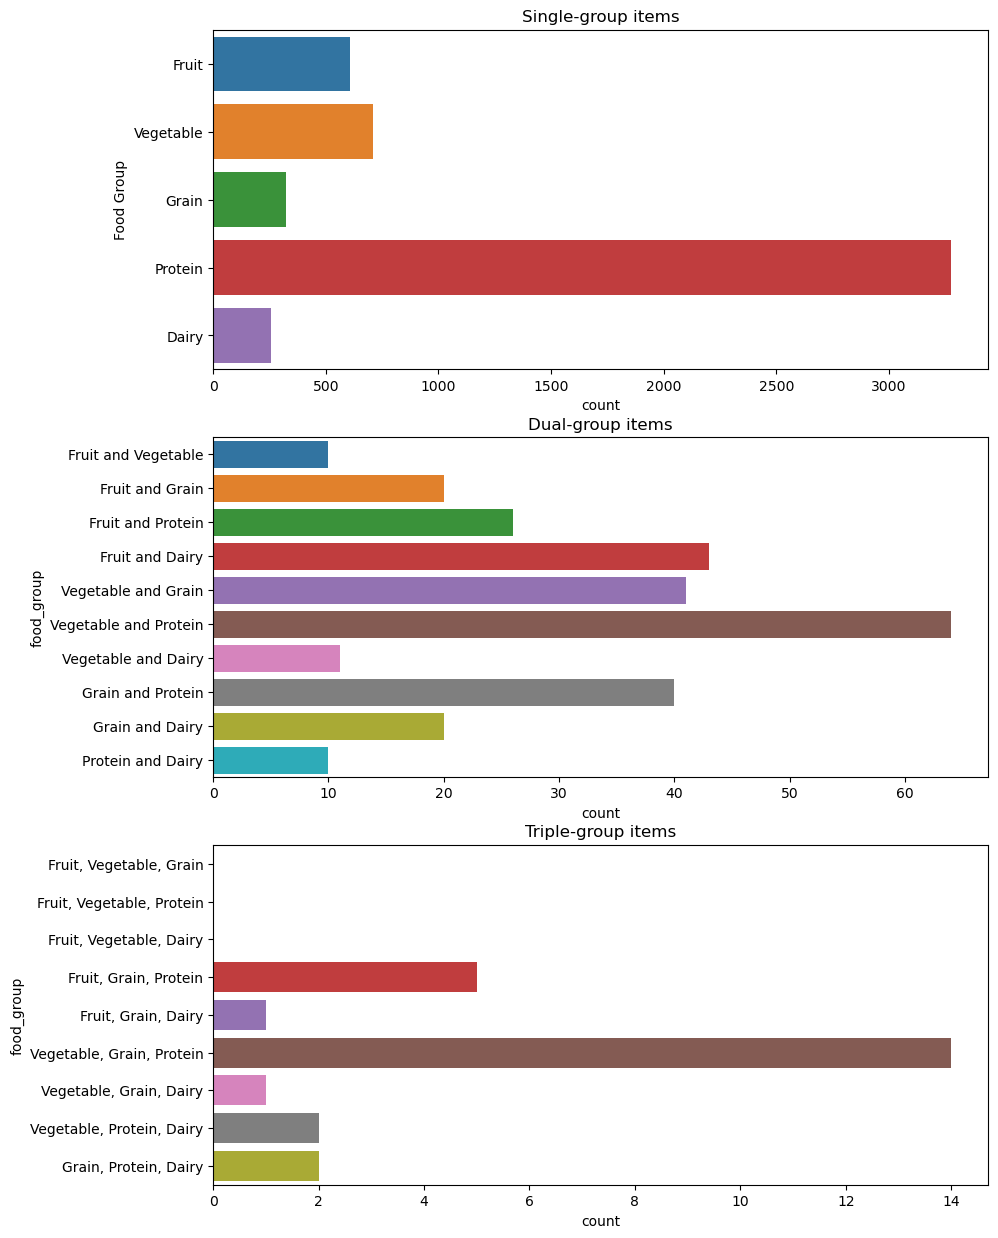

In [771]:
# Plot: count of each food group in the data
single_group = nutrition.query("(food_group == 'Fruit') | (food_group == 'Vegetable') | (food_group == 'Grain') | (food_group == 'Protein') | (food_group == 'Dairy')")
single_order = ['Fruit', 'Vegetable', 'Grain', 'Protein', 'Dairy']

dual_group = nutrition.query(
    "(food_group == 'Fruit and Vegetable') |" 
    "(food_group == 'Fruit and Grain') |"
    "(food_group == 'Fruit and Protein') |" 
    "(food_group == 'Fruit and Dairy') |" 

    "(food_group == 'Vegetable and Grain') |" 
    "(food_group == 'Vegetable and Protein') |"
    "(food_group == 'Vegetable and Dairy') |" 

    "(food_group == 'Grain and Protein') |" 
    "(food_group == 'Grain and Dairy') |"

    "(food_group == 'Protein and Dairy')"

    )
dual_order = ['Fruit and Vegetable', 'Fruit and Grain', 'Fruit and Protein', 'Fruit and Dairy', 'Vegetable and Grain', 'Vegetable and Protein', 'Vegetable and Dairy', 'Grain and Protein', 'Grain and Dairy', 'Protein and Dairy']

triple_group = nutrition.query(
    "(food_group == 'Fruit, Vegetable, Grain') |" 
    "(food_group == 'Fruit, Vegetable, Protein') |" 
    "(food_group == 'Fruit, Vegetable, Dairy') |" 
    "(food_group == 'Fruit, Grain, Protein') |" 
    "(food_group == 'Fruit, Grain, Dairy') |"
    "(food_group == 'Vegetable, Grain, Protein') |"
    "(food_group == 'Vegetable, Grain, Dairy') |"
    "(food_group == 'Vegetable, Protein, Dairy') |"
    "(food_group == 'Grain, Protein, Dairy')"
    )
triple_order = ['Fruit, Vegetable, Grain', 'Fruit, Vegetable, Protein', 'Fruit, Vegetable, Dairy', 'Fruit, Grain, Protein', 'Fruit, Grain, Dairy', 'Vegetable, Grain, Protein', 'Vegetable, Grain, Dairy', 'Vegetable, Protein, Dairy', 'Grain, Protein, Dairy']

f, ax = plt.subplots(3, 1, figsize=(10, 15))
sns.countplot(y='food_group', data=single_group, order=single_order, ax=ax[0])
ax[0].set_title("Single-group items")
ax[0].set_ylabel("Food Group")

sns.countplot(y='food_group', data=dual_group, order=dual_order, ax=ax[1])
ax[1].set_title("Dual-group items")

sns.countplot(y='food_group', data=triple_group, order=triple_order, ax=ax[2])
ax[2].set_title("Triple-group items")

plt.show()

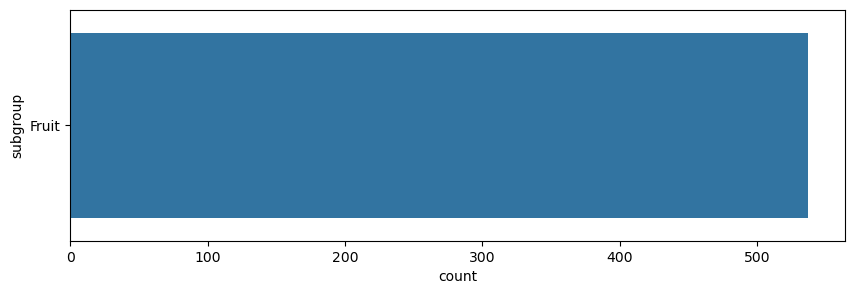

In [772]:
# Plot: count of each subgroup per food group in the data
fruit_group = nutrition.query("food_group == 'Fruit'")
f, ax = plt.subplots(figsize=(10, 3))
sns.countplot(y='subgroup', data=fruit_group)
plt.show()

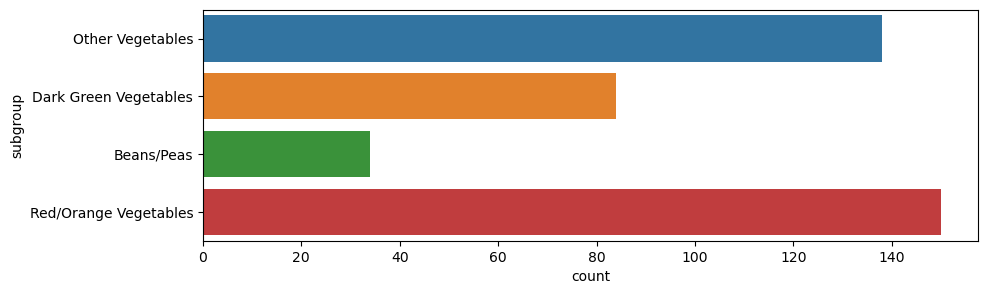

In [773]:
# Plot: count of each subgroup per food group in the data
vegetable_group = nutrition.query("food_group == 'Vegetable'")
f, ax = plt.subplots(figsize=(10, 3))
sns.countplot(y='subgroup', data=vegetable_group)
plt.show()

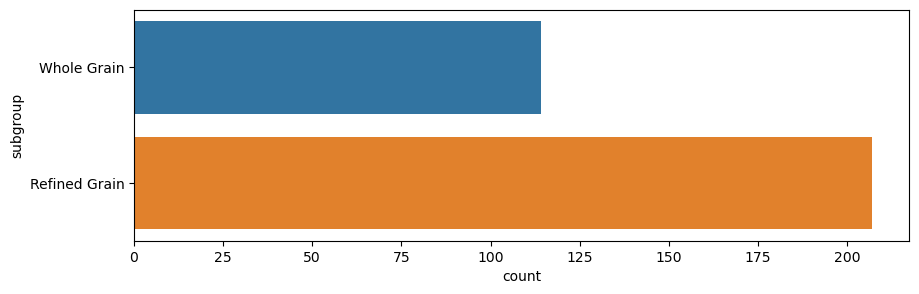

In [774]:
# Plot: count of each subgroup per food group in the data
grain_group = nutrition.query("food_group == 'Grain'")
f, ax = plt.subplots(figsize=(10, 3))
sns.countplot(y='subgroup', data=grain_group)
plt.show()

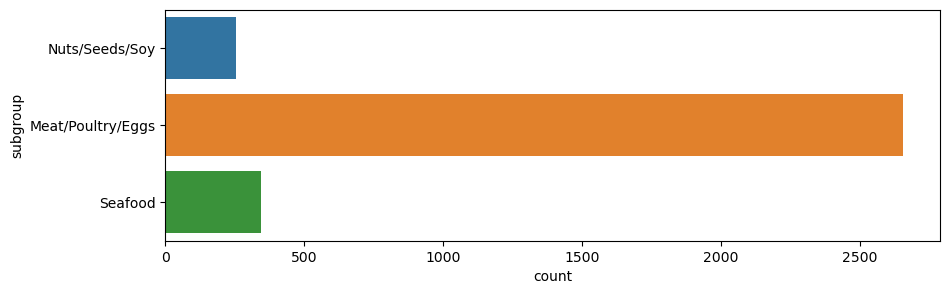

In [775]:
# Plot: count of each subgroup per food group in the data
protein_group = nutrition.query("food_group == 'Protein'")
f, ax = plt.subplots(figsize=(10, 3))
sns.countplot(y='subgroup', data=protein_group)
plt.show()

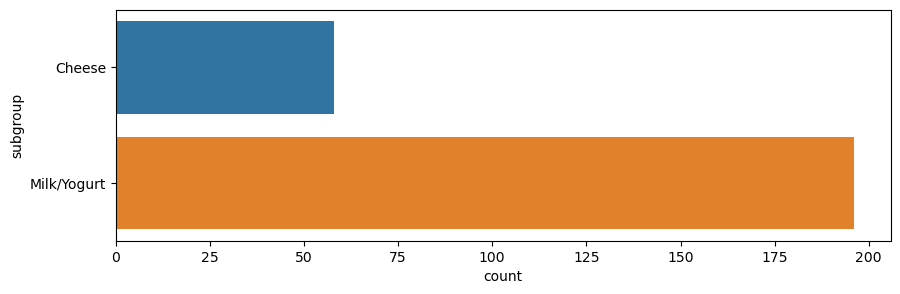

In [776]:
# Plot: count of each subgroup per food group in the data
dairy_group = nutrition.query("food_group == 'Dairy'")
f, ax = plt.subplots(figsize=(10, 3))
sns.countplot(y='subgroup', data=dairy_group)
plt.show()